# Chapter 2 - Text Classification

In [4]:
! pip install -q datasets umap-learn

## Datasets

In [5]:
from datasets import list_datasets

In [6]:
all_datasets = list_datasets()

print(f'There are {len(all_datasets)} datasets availiable in HF Datasets')
print('The first 10 are:', all_datasets[:10])

<ipython-input-6-946d9df99231>:1: FutureWarning: list_datasets is deprecated and will be removed in the next major version of datasets. Use 'huggingface_hub.list_datasets' instead.
  all_datasets = list_datasets()
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


There are 195944 datasets availiable in HF Datasets
The first 10 are: ['amirveyseh/acronym_identification', 'ade-benchmark-corpus/ade_corpus_v2', 'UCLNLP/adversarial_qa', 'Yale-LILY/aeslc', 'nwu-ctext/afrikaans_ner_corpus', 'fancyzhx/ag_news', 'allenai/ai2_arc', 'google/air_dialogue', 'komari6/ajgt_twitter_ar', 'legacy-datasets/allegro_reviews']


In [7]:
from datasets import load_dataset

emotions = load_dataset('emotion')

emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [8]:
train_ds = emotions['train']

train_ds

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

In [9]:
len(train_ds)

16000

In [10]:
train_ds.column_names

['text', 'label']

In [11]:
train_ds.features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}

In [12]:
train_ds[:5]

{'text': ['i didnt feel humiliated',
  'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
  'im grabbing a minute to post i feel greedy wrong',
  'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
  'i am feeling grouchy'],
 'label': [0, 0, 3, 2, 3]}

In [13]:
train_ds['text'][:5]

['i didnt feel humiliated',
 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
 'im grabbing a minute to post i feel greedy wrong',
 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
 'i am feeling grouchy']

In [14]:
emotions_dataset_url = "https://huggingface.co/datasets/transformersbook/emotion-train-split/raw/main/train.txt"
! curl -o emotions_dataset_url.csv {emotions_dataset_url}
! head -n5 emotions_dataset_url.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1619k  100 1619k    0     0  2255k      0 --:--:-- --:--:-- --:--:-- 2252k
i didnt feel humiliated;sadness
i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake;sadness
im grabbing a minute to post i feel greedy wrong;anger
i am ever feeling nostalgic about the fireplace i will know that it is still on the property;love
i am feeling grouchy;anger


In [15]:
emotions_local = load_dataset(
    'csv',
    data_files='emotions_dataset_url.csv',
    sep=';',
    names=['text', 'label']
)

emotions_local

Generating train split: 0 examples [00:00, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
})

## From Datasets to DataFrames

In [16]:
import pandas as pd

In [17]:
emotions.set_format(type='pandas')

df = emotions['train'][:]

df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [18]:
def label_int_to_str(row):
    return emotions['train']\
        .features['label']\
        .int2str(row)


In [19]:
df['label_name'] = df['label'].apply(label_int_to_str)

df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


## Looking to Class Distribuitions

In [20]:
from matplotlib import pyplot as plt

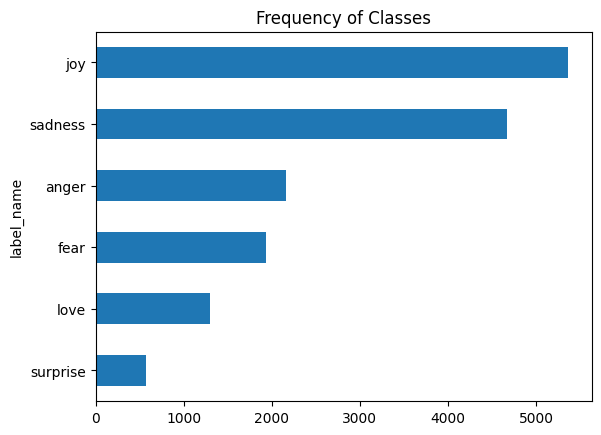

In [21]:
df['label_name']\
    .value_counts(ascending=True)\
    .plot\
    .barh()

plt.title('Frequency of Classes')
plt.show()

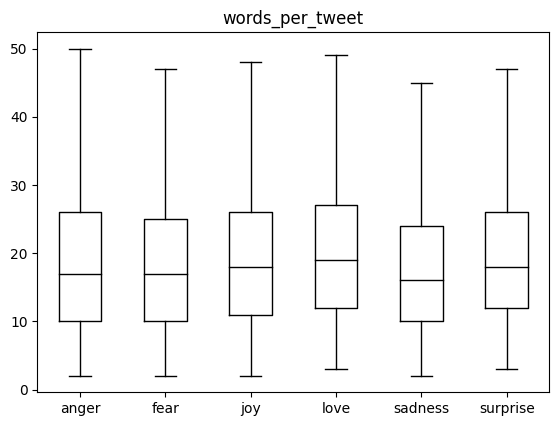

In [22]:
df['words_per_tweet'] = df['text'].str.split().apply(len)

df.boxplot(
    'words_per_tweet',
    by='label_name',
    grid=False,
    showfliers=False,
    color='black'
)

plt.suptitle('')
plt.xlabel('')
plt.show()

In [23]:
emotions.reset_format()

In [24]:
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

## From texts to Tokens

In [25]:
text = 'Tokeninzing text is a core task of NLP.'

tokenized_text = list(text)

tokenized_text


['T',
 'o',
 'k',
 'e',
 'n',
 'i',
 'n',
 'z',
 'i',
 'n',
 'g',
 ' ',
 't',
 'e',
 'x',
 't',
 ' ',
 'i',
 's',
 ' ',
 'a',
 ' ',
 'c',
 'o',
 'r',
 'e',
 ' ',
 't',
 'a',
 's',
 'k',
 ' ',
 'o',
 'f',
 ' ',
 'N',
 'L',
 'P',
 '.']

In [26]:
token_to_index = {ch: idx for idx, ch in enumerate(sorted(set(tokenized_text)))}

token_to_index

{' ': 0,
 '.': 1,
 'L': 2,
 'N': 3,
 'P': 4,
 'T': 5,
 'a': 6,
 'c': 7,
 'e': 8,
 'f': 9,
 'g': 10,
 'i': 11,
 'k': 12,
 'n': 13,
 'o': 14,
 'r': 15,
 's': 16,
 't': 17,
 'x': 18,
 'z': 19}

In [27]:
input_ids = [token_to_index[token] for token in tokenized_text]

input_ids

[5,
 14,
 12,
 8,
 13,
 11,
 13,
 19,
 11,
 13,
 10,
 0,
 17,
 8,
 18,
 17,
 0,
 11,
 16,
 0,
 6,
 0,
 7,
 14,
 15,
 8,
 0,
 17,
 6,
 16,
 12,
 0,
 14,
 9,
 0,
 3,
 2,
 4,
 1]

In [28]:
categorical_df = pd.DataFrame({
    'name': ['Bumblebee', 'Optimus Prime', 'Megatron'],
    'label_id': [0, 1, 2]
})

categorical_df

,name,label_id
0,Bumblebee,0
1,Optimus Prime,1
2,Megatron,2


In [29]:
pd.get_dummies(categorical_df['name'])

,Bumblebee,Megatron,Optimus Prime
0,True,False,False
1,False,False,True
2,False,True,False


In [30]:
import torch
from torch.nn import functional as F

In [31]:
input_ids

[5,
 14,
 12,
 8,
 13,
 11,
 13,
 19,
 11,
 13,
 10,
 0,
 17,
 8,
 18,
 17,
 0,
 11,
 16,
 0,
 6,
 0,
 7,
 14,
 15,
 8,
 0,
 17,
 6,
 16,
 12,
 0,
 14,
 9,
 0,
 3,
 2,
 4,
 1]

In [32]:
input_ids = torch.tensor(input_ids)

one_hot_encodings = F.one_hot(
    input_ids,
    num_classes=len(token_to_index)
)

one_hot_encodings.shape

torch.Size([39, 20])

In [33]:
print(f'Token: {tokenized_text[0]}')
print(f'Tensor index: {input_ids[0]}')
print(f'One-hot: {one_hot_encodings[0]}')

Token: T
Tensor index: 5
One-hot: tensor([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


In [34]:
tokenized_text = text.split()

tokenized_text

['Tokeninzing', 'text', 'is', 'a', 'core', 'task', 'of', 'NLP.']

In [35]:
from transformers import AutoTokenizer

In [36]:
model_checkpoint = 'distilbert-base-uncased'

In [37]:
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

tokenizer

DistilBertTokenizerFast(name_or_path='distilbert-base-uncased', vocab_size=30522, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	100: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	101: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	102: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	103: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}

In [38]:
from transformers import DistilBertTokenizer

In [39]:
encoded_text = tokenizer(text)

encoded_text

{'input_ids': [101, 19204, 2378, 6774, 3793, 2003, 1037, 4563, 4708, 1997, 17953, 2361, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [40]:
tokens = tokenizer.convert_ids_to_tokens(encoded_text.input_ids)

tokens

['[CLS]',
 'token',
 '##in',
 '##zing',
 'text',
 'is',
 'a',
 'core',
 'task',
 'of',
 'nl',
 '##p',
 '.',
 '[SEP]']

In [41]:
tokenizer.convert_tokens_to_string(tokens)

'[CLS] tokeninzing text is a core task of nlp. [SEP]'

In [42]:
tokenizer.vocab_size

30522

In [43]:
tokenizer.model_max_length

512

In [44]:
tokenizer.model_input_names

['input_ids', 'attention_mask']

## Tokenizing the whole Dataset

In [45]:
def tokenize(batch):
    return tokenizer(
        batch['text'],
        padding=True,
        truncation=True
    )

In [46]:
tokenize(emotions['train'][:2])

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}

In [47]:
emotions_encoded = emotions.map(
    tokenize,
    batched=True,
    batch_size=None
)

emotions_encoded

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
})

In [48]:
emotions_encoded['train'].column_names

['text', 'label', 'input_ids', 'attention_mask']

## Training a Text Classifier

In [49]:
from transformers import AutoModel

In [50]:
model_checkpoint = 'distilbert-base-uncased'

In [51]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = AutoModel.from_pretrained(model_checkpoint).to(device)

model

DistilBertModel(
  (embeddings): Embeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (transformer): Transformer(
    (layer): ModuleList(
      (0-5): 6 x TransformerBlock(
        (attention): MultiHeadSelfAttention(
          (dropout): Dropout(p=0.1, inplace=False)
          (q_lin): Linear(in_features=768, out_features=768, bias=True)
          (k_lin): Linear(in_features=768, out_features=768, bias=True)
          (v_lin): Linear(in_features=768, out_features=768, bias=True)
          (out_lin): Linear(in_features=768, out_features=768, bias=True)
        )
        (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (ffn): FFN(
          (dropout): Dropout(p=0.1, inplace=False)
          (lin1): Linear(in_features=768, out_features=3072, bias=True)
          (lin2): Li

In [52]:
from transformers import TFAutoModel

In [53]:
tf_model = TFAutoModel.from_pretrained(model_checkpoint)

tf_model

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertModel: ['vocab_projector.bias', 'vocab_transform.bias', 'vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_transform.weight']
- This IS expected if you are initializing TFDistilBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFDistilBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


In [54]:
tf_xlmr = TFAutoModel.from_pretrained('xlm-roberta-base')

tf_xlmr

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFXLMRobertaModel: ['lm_head.layer_norm.weight', 'lm_head.dense.weight', 'lm_head.bias', 'lm_head.layer_norm.bias', 'lm_head.dense.bias']
- This IS expected if you are initializing TFXLMRobertaModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFXLMRobertaModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFXLMRobertaModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFXLMRobertaModel for predictions without further training.


In [55]:
tf_xlmr = TFAutoModel.from_pretrained(
    'xlm-roberta-base',
    from_pt=True
)

tf_xlmr

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFXLMRobertaModel: ['lm_head.layer_norm.weight', 'lm_head.dense.weight', 'lm_head.bias', 'lm_head.layer_norm.bias', 'lm_head.dense.bias', 'lm_head.decoder.weight']
- This IS expected if you are initializing TFXLMRobertaModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFXLMRobertaModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFXLMRobertaModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFXLMRobertaModel for predictions without further training.


In [56]:
text = 'this is a test'

inputs = tokenizer(
    text,
    return_tensors='pt'
)

print(f"Input tensor shape: {inputs['input_ids'].size()}")

Input tensor shape: torch.Size([1, 6])


In [57]:
inputs = {k: v.to(device) for k, v in inputs.items()}

with torch.no_grad():
    outputs = model(**inputs)

outputs

BaseModelOutput(last_hidden_state=tensor([[[-0.1565, -0.1862,  0.0528,  ..., -0.1188,  0.0662,  0.5470],
         [-0.3575, -0.6484, -0.0618,  ..., -0.3040,  0.3508,  0.5221],
         [-0.2772, -0.4459,  0.1818,  ..., -0.0948, -0.0076,  0.9958],
         [-0.2841, -0.3917,  0.3753,  ..., -0.2151, -0.1173,  1.0526],
         [ 0.2661, -0.5094, -0.3180,  ..., -0.4203,  0.0144, -0.2149],
         [ 0.9441,  0.0112, -0.4714,  ...,  0.1439, -0.7288, -0.1619]]],
       device='cuda:0'), hidden_states=None, attentions=None)

In [58]:
outputs.last_hidden_state.size()

torch.Size([1, 6, 768])

In [59]:
outputs.last_hidden_state[:, 0].size()

torch.Size([1, 768])

In [60]:
def extract_hidden_states(batch):
    inputs = {k: v.to(device) for k, v in batch.items()
              if k in tokenizer.model_input_names}

    with torch.no_grad():
        last_hidden_state = model(**inputs).last_hidden_state

    return {'hidden_state': last_hidden_state[:, 0].cpu().numpy()}

In [61]:
emotions_encoded.set_format(
    'torch',
    columns=['input_ids', 'attention_mask', 'label']
)

In [62]:
emotions_hidden = emotions_encoded.map(
    extract_hidden_states,
    batched=True
)

emotions_hidden

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask', 'hidden_state'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask', 'hidden_state'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask', 'hidden_state'],
        num_rows: 2000
    })
})

In [63]:
emotions_hidden['train'].column_names

['text', 'label', 'input_ids', 'attention_mask', 'hidden_state']

In [64]:
import numpy as np

In [65]:
X_train = np.array(emotions_hidden['train']['hidden_state'])
X_valid = np.array(emotions_hidden['validation']['hidden_state'])
y_train = np.array(emotions_hidden['train']['label'])
y_valid = np.array(emotions_hidden['validation']['label'])

X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((16000, 768), (2000, 768), (16000,), (2000,))

In [66]:
from umap import UMAP
from sklearn.preprocessing import MinMaxScaler

In [69]:
X_scaled = MinMaxScaler().fit_transform(X_train)

mapper = UMAP(
    n_components=2,
    metric='cosine'
).fit(X_scaled)

df_emb = pd.DataFrame(
    mapper.embedding_,
    columns=['X', 'Y']
)

df_emb['label'] = y_train

df_emb.head()

,X,Y,label
0,4.192148,6.530759,0
1,-3.188469,5.955219,0
2,5.154748,3.069472,3
3,-2.685455,3.644736,2
4,-3.453145,4.003701,3


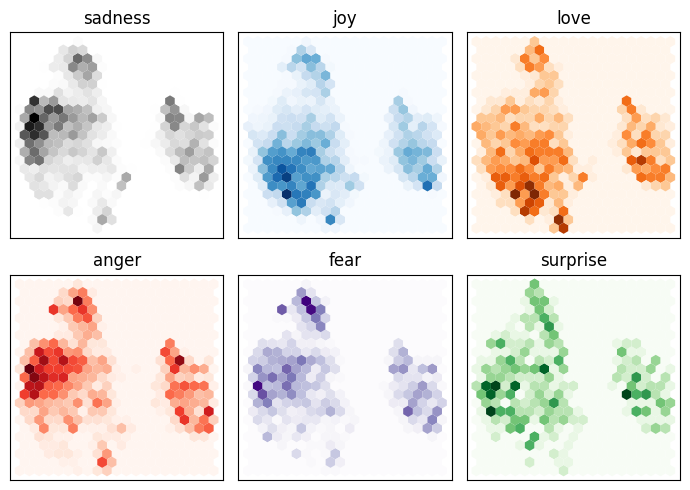

In [70]:
fig, axes = plt.subplots(2, 3, figsize=(7, 5))

axes = axes.flatten()

cmaps = [
    'Greys',
    'Blues',
    'Oranges',
    'Reds',
    'Purples',
    'Greens'
]

labels = emotions['train'].features['label'].names

for i, (label, cmap) in enumerate(zip(labels, cmaps)):
    df_emb_sub = df_emb.query(f'label == {i}')

    axes[i].hexbin(
        df_emb_sub['X'],
        df_emb_sub['Y'],
        cmap=cmap,
        gridsize=20,
        linewidths=(0, )
    )

    axes[i].set_title(label)

    axes[i].set_xticks([])

    axes[i].set_yticks([])

plt.tight_layout()

plt.show()

In [72]:
from sklearn.linear_model import LogisticRegression

In [73]:
lr_clf = LogisticRegression(max_iter=3000)

lr_clf.fit(X_train, y_train)

lr_clf.score(X_valid, y_valid)

0.634

In [74]:
from sklearn.dummy import DummyClassifier

In [76]:
dummy_clf = DummyClassifier(strategy='most_frequent')

dummy_clf.fit(X_train, y_train)

dummy_clf.score(X_valid, y_valid)

0.352

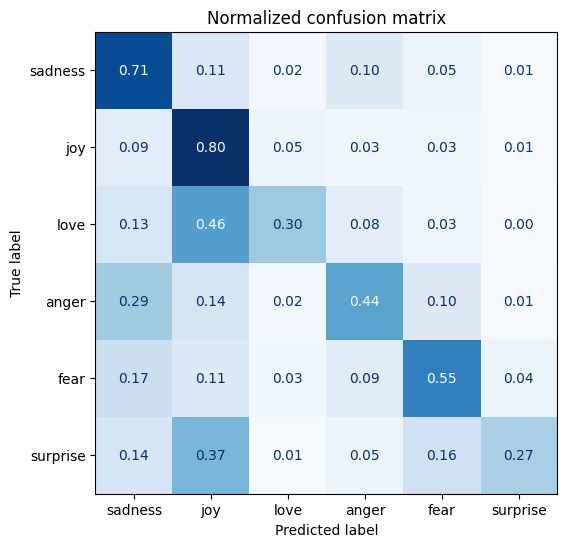

In [79]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

def plot_confusion_matrix(y_preds, y_true, labels):
    cm = confusion_matrix(y_true, y_preds, normalize='true')

    fig, ax = plt.subplots(figsize=(6, 6))

    disp = ConfusionMatrixDisplay(
        confusion_matrix=cm,
        display_labels=labels
    )

    disp.plot(
        cmap='Blues',
        values_format='.2f',
        ax=ax,
        colorbar=False
    )

    plt.title('Normalized confusion matrix')

    plt.show()

y_preds = lr_clf.predict(X_valid)

plot_confusion_matrix(y_preds, y_valid, labels)

In [80]:
from transformers import AutoModelForSequenceClassification

In [81]:
num_labels = 6

model = AutoModelForSequenceClassification\
    .from_pretrained(model_checkpoint, num_labels=num_labels)\
    .to(device)

model

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
 

In [82]:
from sklearn.metrics import accuracy_score, f1_score

In [83]:
def compute_metrics(pred):
    labels = pred.label_ids

    preds = pred.predictions.argmax(-1)

    f1 = f1_score(labels, preds, average='weighted')

    acc = accuracy_score(labels, preds)

    return {'accuracy': acc, 'f1 Score': f1}

In [84]:
from huggingface_hub import notebook_login

In [86]:
notebook_login()

In [88]:
from transformers import Trainer, TrainingArguments

In [92]:
batch_size = 64

logging_steps = len(emotions_encoded['train']) // batch_size

model_name = f'{model_checkpoint}-finetuned-emotions'

In [95]:
training_arguments = TrainingArguments(
    output_dir=model_name,
    num_train_epochs=2,
    learning_rate=2e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    weight_decay=.01,
    evaluation_strategy='epoch',
    disable_tqdm=False,
    logging_steps=logging_steps,
    push_to_hub=True,
    log_level='error'
)

training_arguments

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1494: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


TrainingArguments(
_n_gpu=1,
accelerator_config={'split_batches': False, 'dispatch_batches': None, 'even_batches': True, 'use_seedable_sampler': True, 'non_blocking': False, 'gradient_accumulation_kwargs': None, 'use_configured_state': False},
adafactor=False,
adam_beta1=0.9,
adam_beta2=0.999,
adam_epsilon=1e-08,
auto_find_batch_size=False,
batch_eval_metrics=False,
bf16=False,
bf16_full_eval=False,
data_seed=None,
dataloader_drop_last=False,
dataloader_num_workers=0,
dataloader_persistent_workers=False,
dataloader_pin_memory=True,
dataloader_prefetch_factor=None,
ddp_backend=None,
ddp_broadcast_buffers=None,
ddp_bucket_cap_mb=None,
ddp_find_unused_parameters=None,
ddp_timeout=1800,
debug=[],
deepspeed=None,
disable_tqdm=False,
dispatch_batches=None,
do_eval=True,
do_predict=False,
do_train=False,
eval_accumulation_steps=None,
eval_delay=0,
eval_do_concat_batches=True,
eval_on_start=False,
eval_steps=None,
eval_strategy=epoch,
evaluation_strategy=epoch,
fp16=False,
fp16_backend=auto,
f

In [96]:
from transformers import Trainer

In [98]:
trainer = Trainer(
    model=model,
    args=training_arguments,
    compute_metrics=compute_metrics,
    train_dataset=emotions_encoded['train'],
    eval_dataset=emotions_encoded['validation'],
    tokenizer=tokenizer
)

trainer

In [99]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1 score
1,0.818200,0.300574,0.913500,0.913073
2,0.239000,0.214755,0.924000,0.924201


TrainOutput(global_step=500, training_loss=0.5286131973266601, metrics={'train_runtime': 234.7058, 'train_samples_per_second': 136.341, 'train_steps_per_second': 2.13, 'total_flos': 720342861696000.0, 'train_loss': 0.5286131973266601, 'epoch': 2.0})

In [100]:
preds_outputs = trainer.predict(
    emotions_encoded['validation']
)

preds_outputs

PredictionOutput(predictions=array([[ 4.506711  , -0.9195743 , -0.6035606 , -0.7926949 , -0.79737973,
        -1.6720858 ],
       [ 4.545294  , -0.97805727, -1.0235015 , -0.4841364 , -0.5627412 ,
        -1.8203492 ],
       [-1.2925069 ,  1.8562496 ,  2.5464208 , -1.4195935 , -1.6700591 ,
        -1.5025675 ],
       ...,
       [-1.6052692 ,  4.3151393 ,  0.15017961, -1.5719446 , -1.7088326 ,
        -1.3280015 ],
       [-1.7476246 ,  2.4969409 ,  2.3674667 , -1.6290286 , -1.7884839 ,
        -1.4503627 ],
       [-2.0462937 ,  4.173761  , -0.07966188, -1.9187287 , -1.7474725 ,
        -0.2731888 ]], dtype=float32), label_ids=array([0, 0, 2, ..., 1, 1, 1]), metrics={'test_loss': 0.21475481986999512, 'test_accuracy': 0.924, 'test_f1 Score': 0.9242009794241061, 'test_runtime': 3.8797, 'test_samples_per_second': 515.498, 'test_steps_per_second': 8.248})

In [101]:
preds_outputs.metrics

{'test_loss': 0.21475481986999512,
 'test_accuracy': 0.924,
 'test_f1 Score': 0.9242009794241061,
 'test_runtime': 3.8797,
 'test_samples_per_second': 515.498,
 'test_steps_per_second': 8.248}

In [104]:
y_preds = np.argmax(
    preds_outputs.predictions,
    axis=1
)

y_preds

array([0, 0, 2, ..., 1, 1, 1])

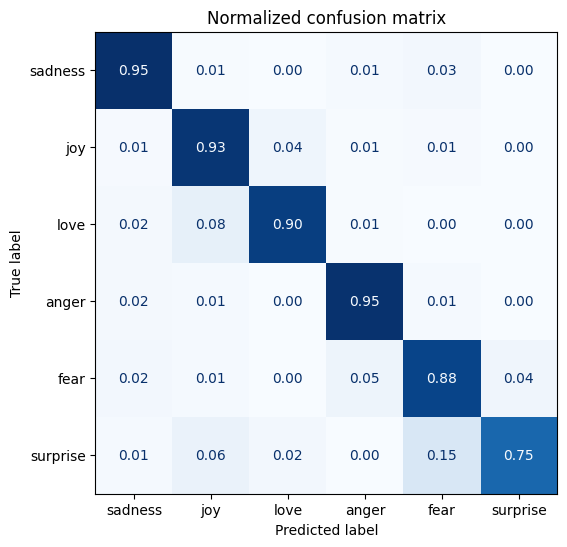

In [105]:
plot_confusion_matrix(y_preds, y_valid, labels)

In [106]:
from transformers import TFAutoModelForSequenceClassification

In [107]:
tf_model = TFAutoModelForSequenceClassification\
    .from_pretrained(model_checkpoint, num_labels=num_labels)

tf_model

In [109]:
tokenizer_columns = tokenizer.model_input_names

tf_train_dataset = emotions_encoded['train'].to_tf_dataset(
    columns=tokenizer_columns,
    label_cols=['label'],
    shuffle=True,
    batch_size=batch_size
)

tf_validation_dataset = emotions_encoded['validation'].to_tf_dataset(
    columns=tokenizer_columns,
    label_cols=['label'],
    shuffle=True,
    batch_size=batch_size
)

tf_train_dataset, tf_validation_dataset

/usr/local/lib/python3.10/dist-packages/datasets/arrow_dataset.py:410: FutureWarning: The output of `to_tf_dataset` will change when a passing single element list for `labels` or `columns` in the next datasets version. To return a tuple structure rather than dict, pass a single string.
Old behaviour: columns=['a'], labels=['labels'] -> (tf.Tensor, tf.Tensor)  
             : columns='a', labels='labels' -> (tf.Tensor, tf.Tensor)  
New behaviour: columns=['a'],labels=['labels'] -> ({'a': tf.Tensor}, {'labels': tf.Tensor})  
             : columns='a', labels='labels' -> (tf.Tensor, tf.Tensor) 
  warnings.warn(


(<_PrefetchDataset element_spec=({'input_ids': TensorSpec(shape=(None, 87), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(None, 87), dtype=tf.int64, name=None)}, TensorSpec(shape=(None,), dtype=tf.int64, name=None))>,
 <_PrefetchDataset element_spec=({'input_ids': TensorSpec(shape=(None, 69), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(None, 69), dtype=tf.int64, name=None)}, TensorSpec(shape=(None,), dtype=tf.int64, name=None))>)

In [110]:
import tensorflow as tf

In [113]:
tf_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=5e-5),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=tf.metrics.SparseCategoricalAccuracy()
)

tf_model.fit(
    tf_train_dataset,
    validation_data=tf_validation_dataset,
    epochs=2
)

Epoch 1/2
250/250 [==============================] - 154s 525ms/step - loss: 0.5283 - sparse_categorical_accuracy: 0.8153 - val_loss: 0.2020 - val_sparse_categorical_accuracy: 0.9270
Epoch 2/2
250/250 [==============================] - 132s 527ms/step - loss: 0.1416 - sparse_categorical_accuracy: 0.9388 - val_loss: 0.1353 - val_sparse_categorical_accuracy: 0.9405


In [116]:
from torch.nn.functional import cross_entropy

def forward_pass_with_label(batch):
    inputs = {k: v.to(device) for k, v in batch.items()
              if k in tokenizer.model_input_names}

    with torch.no_grad():
        output = model(**inputs)

        pred_label = torch.argmax(output.logits, axis=-1)

        loss = cross_entropy(
            output.logits,
            batch['label'].to(device),
            reduction='none'
        )

    return {
        'loss': loss.cpu().numpy(),
        'predicted_label': pred_label.cpu().numpy()
    }

In [117]:
emotions_encoded.set_format(
    'torch',
    columns=['input_ids', 'attention_mask', 'label']
)

emotions_encoded['validation'] = emotions_encoded['validation']\
    .map(forward_pass_with_label, batched=True, batch_size=16)



Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [118]:
emotions_encoded.set_format('pandas')

cols = ['text', 'label', 'predicted_label', 'loss']

df_test = emotions_encoded['validation'][:][cols]

df_test['label'] = df_test['label'].apply(label_int_to_str)

df_test['predicted_label'] = df_test['predicted_label']\
    .apply(label_int_to_str)

In [120]:
df_test.sort_values('loss', ascending=False).head(10)

,text,label,predicted_label,loss
1950,i as representative of everything thats wrong ...,surprise,sadness,5.663681
1963,i called myself pro life and voted for perry w...,joy,sadness,5.514472
1870,i guess i feel betrayed because i admired him ...,joy,sadness,5.296245
177,im sure much of the advantage is psychological...,sadness,joy,5.266713
1500,i guess we would naturally feel a sense of lon...,anger,sadness,4.899312
1801,i feel that he was being overshadowed by the s...,love,sadness,4.659047
318,i felt ashamed of these feelings and was scare...,fear,sadness,4.561292
1509,i guess this is a memoir so it feels like that...,joy,fear,4.519863
1274,i am going to several holiday parties and i ca...,joy,sadness,4.385940
1836,i got a very nasty electrical shock when i was...,fear,anger,4.316081


In [121]:
df_test.sort_values('loss', ascending=True).head(10)

,text,label,predicted_label,loss
1873,i feel practically virtuous this month i have ...,joy,joy,0.013364
578,i got to christmas feeling positive about the ...,joy,joy,0.013481
1147,i type i feel bouncy and excited to get out my...,joy,joy,0.013963
1205,i log on feeling vaguely sociable and after a ...,joy,joy,0.014071
1513,i have also been getting back into my gym rout...,joy,joy,0.014127
1780,ive explained that he is very creative and lov...,joy,joy,0.014160
1523,i dont give a fuck because i feel like i canno...,joy,joy,0.014377
632,i feel he is an terrific really worth bet,joy,joy,0.014527
669,i am not feeling very joyful today its been a ...,joy,joy,0.014549
1263,i feel this way about blake lively,joy,joy,0.014585


In [122]:
trainer.push_to_hub(commit_message='Training completed!')

events.out.tfevents.1723925041.99fd83d780d7.2600.0:   0%|          | 0.00/6.58k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/LucasVmigotto/distilbert-base-uncased-finetuned-emotions/commit/6276d2134834982eb991c8f9ea13ed9c738bd2a6', commit_message='Training completed!', commit_description='', oid='6276d2134834982eb991c8f9ea13ed9c738bd2a6', pr_url=None, pr_revision=None, pr_num=None)

In [123]:
from transformers import pipeline

In [125]:
user_id = 'lucasvmigotto'

model_id = f'{user_id}/{model_name}'

classifier = pipeline('text-classification', model=model_id)

classifier

config.json:   0%|          | 0.00/883 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.20k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

In [126]:
custom_tweet = 'I saw a movie today and it was really good'

preds = classifier(custom_tweet, return_all_scores=True)

preds

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


[[{'label': 'LABEL_0', 'score': 0.010645054280757904},
  {'label': 'LABEL_1', 'score': 0.9625544548034668},
  {'label': 'LABEL_2', 'score': 0.010221532545983791},
  {'label': 'LABEL_3', 'score': 0.0059041897766292095},
  {'label': 'LABEL_4', 'score': 0.004810782615095377},
  {'label': 'LABEL_5', 'score': 0.005863947328180075}]]

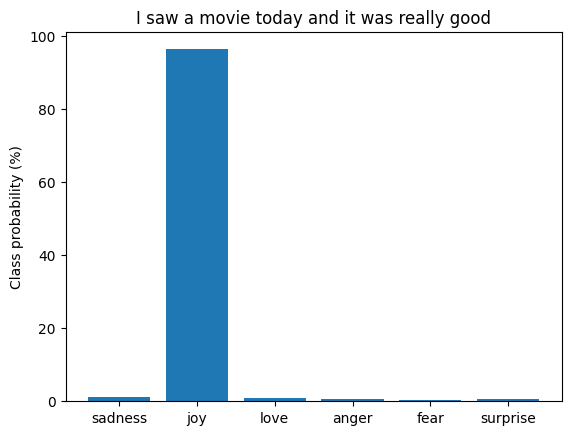

In [128]:
preds_df = pd.DataFrame(preds[0])

plt.bar(labels, 100 * preds_df['score'], color='C0')

plt.title(custom_tweet)

plt.ylabel('Class probability (%)')

plt.show()